In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path

# Set plot styling
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
# Load the stock price data
data_path = Path("../Data/Processed/stock_data_simple.pkl")

try:
    with open(data_path, 'rb') as f:
        stock_data = pickle.load(f)
    print(f"Successfully loaded data from {data_path}")
except Exception as e:
    print(f"Error loading data: {e}")

In [5]:
# Let's examine the data structure
print(f"Data shape: {stock_data.shape}")
print(f"\nFirst few rows:")
stock_data.head()

Successfully loaded data from ..\Data\Processed\stock_data_simple.pkl


In [21]:
# Display basic information about the dataset
print(f"Date range: {stock_data.index.min()} to {stock_data.index.max()}")

# Check for missing values
na_counts = stock_data.isna().sum()
print(f"\nMissing values per stock:")
print(na_counts[na_counts > 0] if na_counts.sum() > 0 else "No missing values")

Date range: 2018-01-02 09:30:00 to 2025-05-30 15:45:00

Missing values per stock:
No missing values


## Calculating Daily Returns

To analyze correlations, we'll calculate the percentage change in stock prices (daily returns) rather than using the absolute prices. This gives us a better measure of how stock price movements correlate with each other.

## Correlation Analysis

Now we'll compute and visualize the correlation matrix between stock returns. The correlation coefficient ranges from -1 to 1:

- +1 indicates perfect positive correlation (stocks move exactly together)
- 0 indicates no correlation (stocks move independently)
- -1 indicates perfect negative correlation (stocks move exactly opposite)

In [17]:
# New dataframe which is all columns with '%Chg' suffix
returns = stock_data.filter(like='%Chg')

# Rename the columns to remove the '%Chg' suffix
returns.columns = returns.columns.str.replace('_%Chg', '', regex=False)

# Compute correlation matrix of daily returns
correlation_matrix = returns.corr()

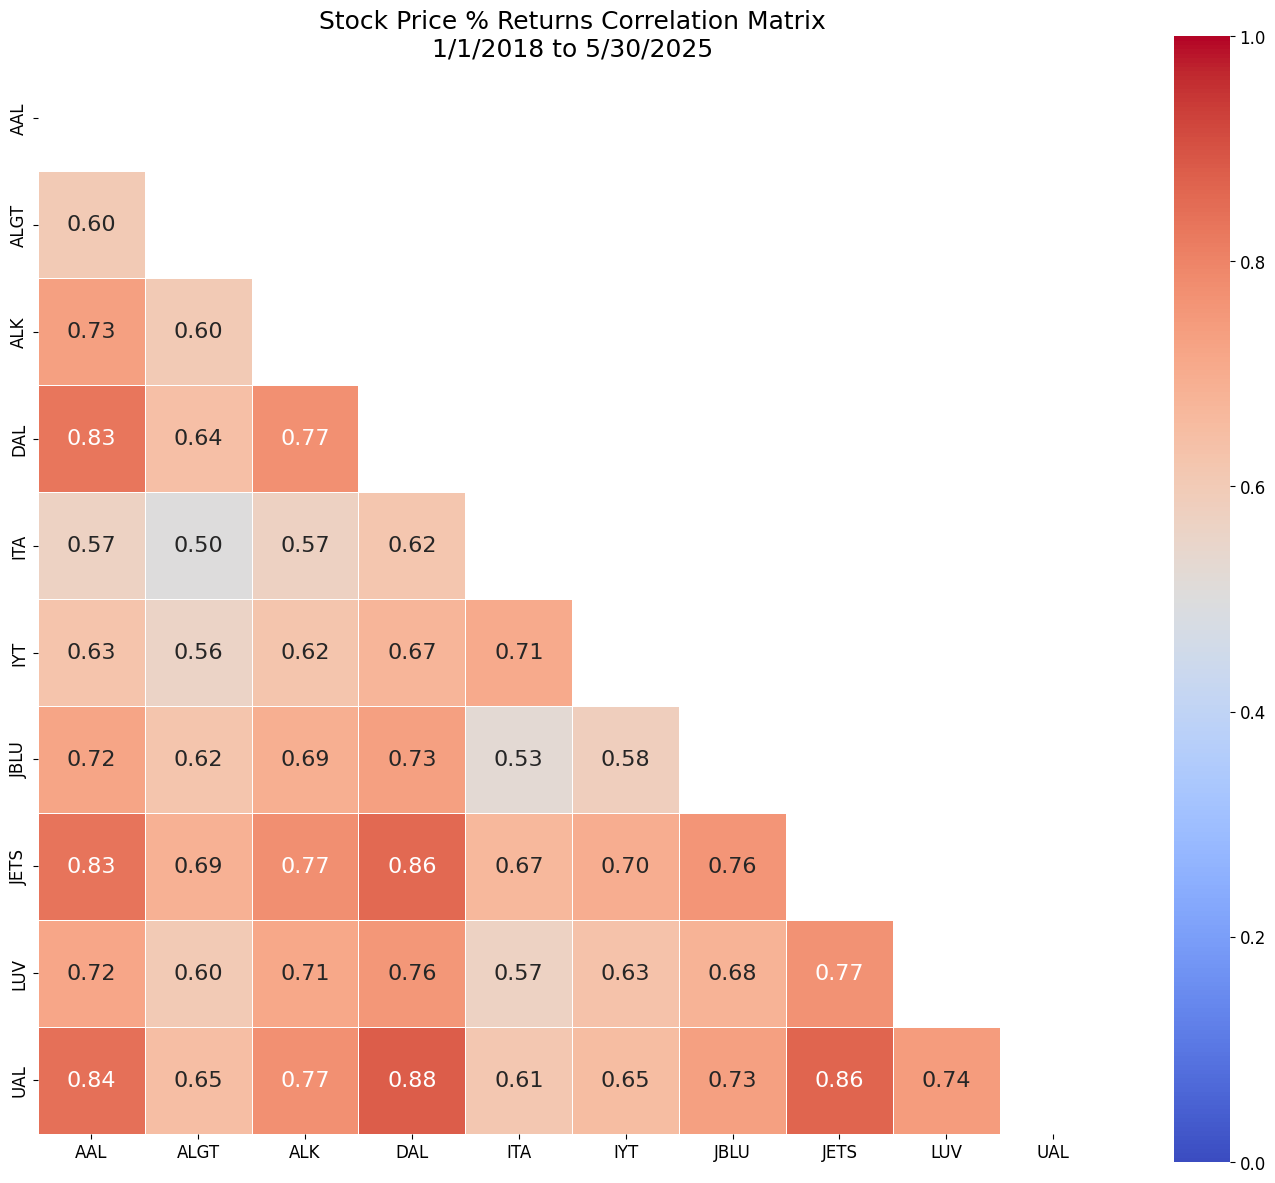

In [23]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap with annotations (lower triangle only)
sns.heatmap(
    correlation_matrix, 
    mask=mask,
    annot=True, 
    cmap='coolwarm', 
    vmin=0, 
    vmax=1, 
    fmt='.2f',
    linewidths=0.5,
    square=True,
    annot_kws={'size': 16}
)

plt.title('Stock Price % Returns Correlation Matrix\n1/1/2018 to 5/30/2025', fontsize=18)
plt.tight_layout()
plt.show()